# Assignment 27.11.17 - Patrick Werner

## Exercise 1
![Mindmap](mindmap.png)

## Exercise 2

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as cls
import sklearn.cluster as cluster
import sklearn.datasets as ds
import seaborn as sns

# Prettier plots
sns.set()

# Save plots as vector graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')
#set_matplotlib_formats('pdf', 'png') # too much for scatter
sns.set(rc={"savefig.dpi" : 75,
            "figure.figsize" : [10, 8]})

# Use latex for plot texts
#sns.set(font_scale=1.5, rc={"text.usetex" : True,
#            "font.family" : "serif",
#            "font.serif" : "cm"})

In [2]:
def makeMoonsParametrized(nSamples, radius, width, d, **kwargs):
    # 1 sample consists of a pair of A and B
    nSamples *= 2 
    
    # Get moons 
    moons, inds = ds.make_moons(nSamples, shuffle = False, noise = kwargs.get("noise"))
        
    # Extract moons
    moonA = moons[inds == 0]
    moonB = moons[inds == 1]

    # Move moon B to origin
    moonB[:,0] -= 1
    moonB[:,1] -= 0.5

    # Apply radius and width
    moonA *= radius
    moonA *= np.random.uniform((radius - width/2)/radius, (radius + width/2)/radius, moonA.shape)
    moonB *= radius
    moonB *= np.random.uniform((radius - width/2)/radius, (radius + width/2)/radius, moonB.shape)

    # Move moon B back
    moonB[:,0] += radius
    moonB[:,1] -= d
    
    moons = np.append(moonA, moonB, 0)
    
    # Shuffle dataset, assumes inds is unshuffled (neccessary?)
    rngState = np.random.get_state()
    np.random.shuffle(moons)
    np.random.set_state(rngState)
    np.random.shuffle(inds)
    
    return moons, inds

In [3]:
# Constant parameters
radius = 10
width = 6
nSamples = 1000
nClusters = 6
dRange = (-1, 0, 1, 2, 3, 4, 5, 6)

### a)
Initial centers for the clusters are provided in order to keep the same ordering of clusters.

Distance = -1
Mean for cluster 1: [-8.368475    4.66668552]
Variance for cluster 1: 3.67138941769
Mean for cluster 2: [-0.26935898  9.72040786]
Variance for cluster 2: 3.82170932459
Mean for cluster 3: [ 8.18821182  4.78931802]
Variance for cluster 3: 4.08860231251
Mean for cluster 4: [ 1.5466169  -5.64453919]
Variance for cluster 4: 3.573001324
Mean for cluster 5: [  9.68195403 -10.64735333]
Variance for cluster 5: 3.70856137282
Mean for cluster 6: [ 17.9957517   -5.77979532]
Variance for cluster 6: 3.80003962748

Distance = 0
Mean for cluster 1: [-8.32974545  4.61417861]
Variance for cluster 1: 3.46710046941
Mean for cluster 2: [  6.18788109e-03   9.58059149e+00]
Variance for cluster 2: 3.85201256437
Mean for cluster 3: [ 8.53490558  4.61333804]
Variance for cluster 3: 3.66768284708
Mean for cluster 4: [ 1.76214032 -4.782289  ]
Variance for cluster 4: 3.81094070665
Mean for cluster 5: [ 10.35749129  -9.64513608]
Variance for cluster 5: 4.180139926
Mean for cluster 6: [ 18.4586538   -

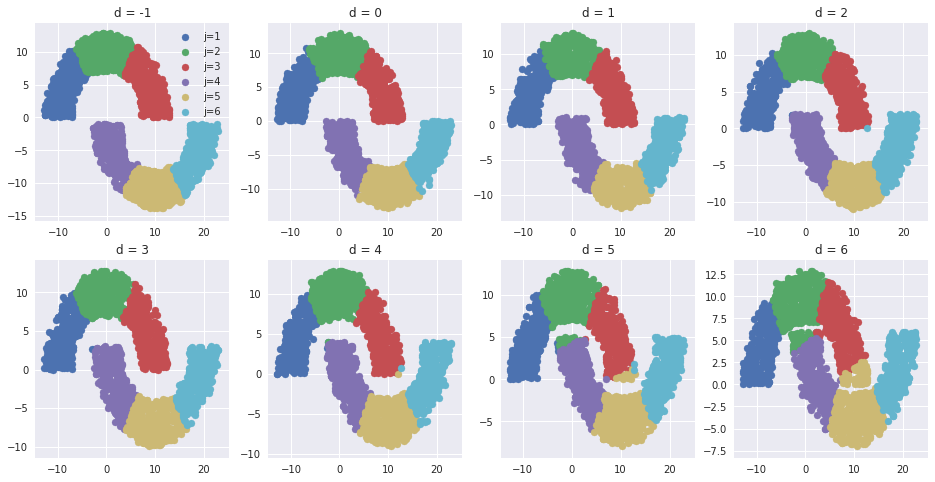

In [4]:
np.random.seed(0)

means = []
variances = []

fig, axArr = plt.subplots(2,4, figsize=(16,8))

for di, d in enumerate(dRange):
    print("Distance = " + str(d))
    moons, inds = makeMoonsParametrized(nSamples, radius, width, -d)
    
    # Set initial centers of the clusters
    initialCenters = np.array([[-10, 5],[0, 10],[8, 5], [0, -5], [10, -10], [18, -8]])
    kmeans = cluster.KMeans(n_clusters=nClusters, init=initialCenters, n_init=1).fit(moons)
    
    meansCluster = []
    variancesCluster = []
    
    axArr[np.unravel_index(di, axArr.shape)].set_title("d = " + str(d))
    
    for i in range(nClusters):
        m = moons[kmeans.labels_==i]
        axArr[np.unravel_index(di, axArr.shape)].scatter(m[:,0], m[:,1], label="j="+str(i+1))
        mean = np.mean(m, 0)
        meansCluster.append(mean)
        # According to Equation (5.27)
        variance = np.sum(np.linalg.norm(m - mean, axis=1)**2)/nSamples
        #variance = np.var(m)
        variancesCluster.append(variance)
        print("Mean for cluster " + str(i + 1) + ": " + str(mean))
        print("Variance for cluster " + str(i + 1) + ": " + str(variance))
    
    means.append(np.array(meansCluster))
    variances.append(np.array(variancesCluster))
    print()

axArr[0,0].legend()
plt.show()
    
means = np.array(means)
variances = np.array(variances);

### b)

In [5]:
print("Change of j = 1 " + str(means[-1,0] - means[0,0]))
print("Change of j = 2 " + str(means[-1,1] - means[0,1]))
print("Change of j = 3 " + str(means[-1,2] - means[0,2]))

Change of j = 1 [-0.42600479 -0.44200805]
Change of j = 2 [-1.25762895 -0.64040253]
Change of j = 3 [-1.1361656   1.43519418]


The effects of reducing $d$ are as follows:

- $j=1$ was shifted a little bit the the left and down, but was overall affected the least

- $j=2$ was shifted to the left and down by incorporating some of the points of the nearing moon

- $j=3$ was shifted to the left by enclosing some of the points j=2 lost and up by losing points to j=5


### c)

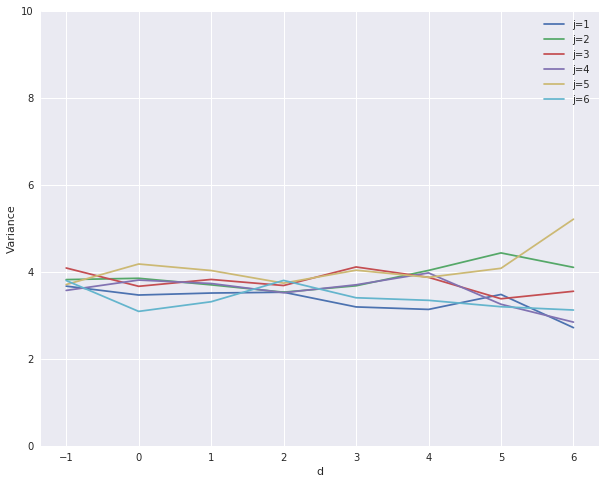

In [6]:
for i in range(nClusters):
    plt.plot(dRange, variances[:,i], label="j="+str(i+1))
plt.legend()
plt.xlabel("d")
plt.ylabel("Variance")
plt.ylim((0, 10))
plt.show()

### d)

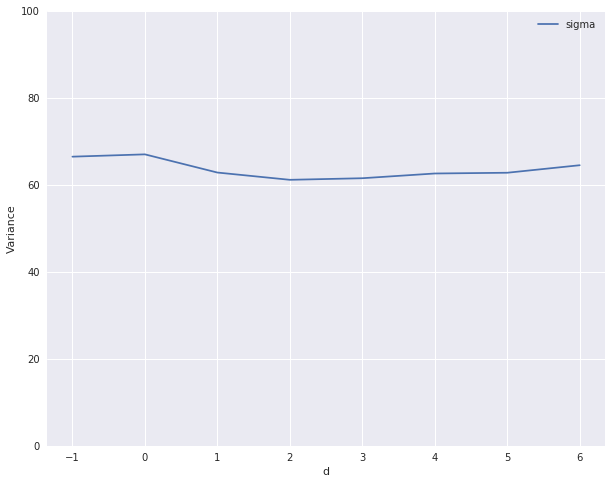

In [7]:
sigmas = []
for d in (1, 0, -1, -2, -3, -4, -5, -6):
    v = []
    for i in range(nClusters):
        for j in range(nClusters):
            v.append(np.linalg.norm(means[d][i] - means[d][j]))
    dmax = np.max(v)
    # According to Equation (5.49)
    sigma = dmax/np.sqrt(2*nClusters)
    sigmas.append(sigma)
plt.plot(dRange, np.array(sigmas)**2, label="sigma")
plt.xlabel("d")
plt.ylabel("Variance")
plt.legend()
plt.ylim((0,100))
plt.show()

The common $\sigma^2$ seems to follow the same trend as the cluster variances, except for the case $d=6$ where the cluster variances diverge. Additionally the common variance is way higher than the cluster variances. 

## Exercise 3

In [8]:
class RBFNetwork:
    def __init__(self, nInputs, nHidden, nOutput):
        self.centers = np.array([np.random.uniform(-1, 1, nInputs) for i in range(nHidden)])
        self.weights = np.random.random((nHidden, nOutput))

    def train(self, trainingSetInputs, trainingSetOutputs):
        # Step 1 adjust centers with kmeans
        # cluster the data
        kmeans = cluster.KMeans(n_clusters=self.centers.shape[0], init=self.centers, n_init=1).fit(trainingSetInputs)
        for c in range(self.centers.shape[0]):
            # update centers based on clusters
            m = trainingSetInputs[kmeans.labels_==c]
            self.centers[c] = np.mean(m, 0)
        
        # Step 2 adjust weights with least squares algorithm
        hiddenOutputs = self.activate(trainingSetInputs)
        self.weights, _, _, _ = np.linalg.lstsq(hiddenOutputs, trainingSetOutputs)
        
        return np.mean(np.abs(trainingSetOutputs - self.predict(trainingSetInputs)))
        
    def radialBasisFunction(self, current, center):
        # Gaussian
        return np.exp(-np.linalg.norm(current - center)**2)
    
    def activate(self, inputs):
        hiddenOutputs = np.zeros((inputs.shape[0], self.centers.shape[0]))
        for center, ci in zip(self.centers, range(self.centers.shape[0])):
            for inp, ii in zip(inputs, range(inputs.shape[0])):
                hiddenOutputs[ii,ci] = self.radialBasisFunction(inp, center)
        return hiddenOutputs
    
    def predict(self, inputs):
        hiddenOutputs = self.activate(inputs)
        outputs = np.dot(hiddenOutputs, self.weights)
        return outputs

### 1) $1/x$

In [9]:
# Set up data
nTrainingSamples = 1000
nTestSamples = 2000

trainingSetInputs = np.random.uniform(1, 100, (nTrainingSamples, 1))
trainingSetOutputs = 1/trainingSetInputs

testSetInputs = np.random.uniform(1, 100, (nTestSamples, 1))
testSetOutputs = 1/testSetInputs

nMaxHiddenNeurons = 10

In [10]:
rbfns = []

for n in range(1, nMaxHiddenNeurons+1):
    rbfn = RBFNetwork(1, n, 1)
    rbfns.append(rbfn)
    err = rbfn.train(trainingSetInputs, trainingSetOutputs)
    print("Training error of RBFN with " + str(n) + " hidden neurons:", err)

Training error of RBFN with 1 hidden neurons: 0.0440956932228
Training error of RBFN with 2 hidden neurons: 0.0433896515853
Training error of RBFN with 3 hidden neurons: 0.0429514800472
Training error of RBFN with 4 hidden neurons: 0.0418301988833
Training error of RBFN with 5 hidden neurons: 0.0412952007753
Training error of RBFN with 6 hidden neurons: 0.0406689996857
Training error of RBFN with 7 hidden neurons: 0.0403956946128
Training error of RBFN with 8 hidden neurons: 0.0393343526896
Training error of RBFN with 9 hidden neurons: 0.038888173544
Training error of RBFN with 10 hidden neurons: 0.0388289587801


In [11]:
for n in range(nMaxHiddenNeurons):
    outputs = rbfns[n].predict(testSetInputs)
    print("Test error of RBFN with " + str(n+1) + " hidden neurons:", np.mean(np.abs(outputs - testSetOutputs)))

Test error of RBFN with 1 hidden neurons: 0.0479328363705
Test error of RBFN with 2 hidden neurons: 0.0473067113647
Test error of RBFN with 3 hidden neurons: 0.0467920695736
Test error of RBFN with 4 hidden neurons: 0.0462162744372
Test error of RBFN with 5 hidden neurons: 0.0452891058074
Test error of RBFN with 6 hidden neurons: 0.0442806192298
Test error of RBFN with 7 hidden neurons: 0.0441912167403
Test error of RBFN with 8 hidden neurons: 0.0437417006666
Test error of RBFN with 9 hidden neurons: 0.0434423595494
Test error of RBFN with 10 hidden neurons: 0.0431184346719


### 2) $log_{10}(x)$

In [12]:
# Set up data
nTrainingSamples = 1000
nTestSamples = 2000

trainingSetInputs = np.random.uniform(1, 10, (nTrainingSamples, 1))
trainingSetOutputs = np.log10(trainingSetInputs)

testSetInputs = np.random.uniform(1, 10, (nTestSamples, 1))
testSetOutputs = np.log10(testSetInputs)

In [13]:
rbfns = []

for n in range(1, nMaxHiddenNeurons+1):
    rbfn = RBFNetwork(1, n, 1)
    rbfns.append(rbfn)
    err = rbfn.train(trainingSetInputs, trainingSetOutputs)
    print("Training error of RBFN with " + str(n) + " hidden neurons:", err)

Training error of RBFN with 1 hidden neurons: 0.536109074029
Training error of RBFN with 2 hidden neurons: 0.376424795944
Training error of RBFN with 3 hidden neurons: 0.249657150884
Training error of RBFN with 4 hidden neurons: 0.134551613356
Training error of RBFN with 5 hidden neurons: 0.0733518088955
Training error of RBFN with 6 hidden neurons: 0.0371349328794
Training error of RBFN with 7 hidden neurons: 0.0304552347206
Training error of RBFN with 8 hidden neurons: 0.0228410551283
Training error of RBFN with 9 hidden neurons: 0.0140276289988
Training error of RBFN with 10 hidden neurons: 0.00885102966338


In [14]:
for n in range(nMaxHiddenNeurons):
    outputs = rbfns[n].predict(testSetInputs)
    print("Test error of RBFN with " + str(n+1) + " hidden neurons:", np.mean(np.abs(outputs - testSetOutputs)))

Test error of RBFN with 1 hidden neurons: 0.527047022932
Test error of RBFN with 2 hidden neurons: 0.379737130634
Test error of RBFN with 3 hidden neurons: 0.25256371241
Test error of RBFN with 4 hidden neurons: 0.140377995129
Test error of RBFN with 5 hidden neurons: 0.0781761853659
Test error of RBFN with 6 hidden neurons: 0.0388667137654
Test error of RBFN with 7 hidden neurons: 0.0318508878588
Test error of RBFN with 8 hidden neurons: 0.0229779915417
Test error of RBFN with 9 hidden neurons: 0.0147246692546
Test error of RBFN with 10 hidden neurons: 0.00962480811085


### 3) $exp(-x)$

In [15]:
# Set up data
nTrainingSamples = 1000
nTestSamples = 2000

trainingSetInputs = np.random.uniform(1, 10, (nTrainingSamples, 1))
trainingSetOutputs = np.exp(-trainingSetInputs)

testSetInputs = np.random.uniform(1, 10, (nTestSamples, 1))
testSetOutputs = np.exp(-testSetInputs)

In [16]:
rbfns = []

for n in range(1, nMaxHiddenNeurons+1):
    rbfn = RBFNetwork(1, n, 1)
    rbfns.append(rbfn)
    err = rbfn.train(trainingSetInputs, trainingSetOutputs)
    print("Training error of RBFN with " + str(n) + " hidden neurons:", err)

Training error of RBFN with 1 hidden neurons: 0.0422021243517
Training error of RBFN with 2 hidden neurons: 0.0363846676452
Training error of RBFN with 3 hidden neurons: 0.0289937235938
Training error of RBFN with 4 hidden neurons: 0.0219560315567
Training error of RBFN with 5 hidden neurons: 0.0218985337464
Training error of RBFN with 6 hidden neurons: 0.020100683342
Training error of RBFN with 7 hidden neurons: 0.0144749434215
Training error of RBFN with 8 hidden neurons: 0.0144972194733
Training error of RBFN with 9 hidden neurons: 0.011967056749
Training error of RBFN with 10 hidden neurons: 0.0119384233601


In [17]:
for n in range(nMaxHiddenNeurons):
    outputs = rbfns[n].predict(testSetInputs)
    print("Test error of RBFN with " + str(n+1) + " hidden neurons:", np.mean(np.abs(outputs - testSetOutputs)))

Test error of RBFN with 1 hidden neurons: 0.0392493856542
Test error of RBFN with 2 hidden neurons: 0.0346128292757
Test error of RBFN with 3 hidden neurons: 0.0270212325309
Test error of RBFN with 4 hidden neurons: 0.0195816002194
Test error of RBFN with 5 hidden neurons: 0.0195373654751
Test error of RBFN with 6 hidden neurons: 0.0180624906167
Test error of RBFN with 7 hidden neurons: 0.0138536336574
Test error of RBFN with 8 hidden neurons: 0.0138476837091
Test error of RBFN with 9 hidden neurons: 0.0117589030789
Test error of RBFN with 10 hidden neurons: 0.0117327048935


### 4) $sin(x)$

In [18]:
# Set up data
nTrainingSamples = 1000
nTestSamples = 2000

trainingSetInputs = np.random.uniform(1, np.pi/2, (nTrainingSamples, 1))
trainingSetOutputs = np.sin(trainingSetInputs)

testSetInputs = np.random.uniform(1, np.pi/2, (nTestSamples, 1))
testSetOutputs = np.sin(testSetInputs)

In [19]:
rbfns = []

for n in range(1, nMaxHiddenNeurons+1):
    rbfn = RBFNetwork(1, n, 1)
    rbfns.append(rbfn)
    err = rbfn.train(trainingSetInputs, trainingSetOutputs)
    print("Training error of RBFN with " + str(n) + " hidden neurons:", err)

Training error of RBFN with 1 hidden neurons: 0.0405071078714
Training error of RBFN with 2 hidden neurons: 0.00896080227178
Training error of RBFN with 3 hidden neurons: 0.000633282149723
Training error of RBFN with 4 hidden neurons: 9.6261475376e-06
Training error of RBFN with 5 hidden neurons: 5.53547633628e-06
Training error of RBFN with 6 hidden neurons: 4.0070819626e-07
Training error of RBFN with 7 hidden neurons: 3.44878897898e-08
Training error of RBFN with 8 hidden neurons: 4.09610155994e-09
Training error of RBFN with 9 hidden neurons: 4.0835156776e-09
Training error of RBFN with 10 hidden neurons: 3.89164712278e-09


In [20]:
for n in range(nMaxHiddenNeurons):
    outputs = rbfns[n].predict(testSetInputs)
    print("Test error of RBFN with " + str(n+1) + " hidden neurons:", np.mean(np.abs(outputs - testSetOutputs)))

Test error of RBFN with 1 hidden neurons: 0.0407184160971
Test error of RBFN with 2 hidden neurons: 0.00870622511539
Test error of RBFN with 3 hidden neurons: 0.000655659056507
Test error of RBFN with 4 hidden neurons: 9.54838821983e-06
Test error of RBFN with 5 hidden neurons: 5.75276147689e-06
Test error of RBFN with 6 hidden neurons: 4.16562707391e-07
Test error of RBFN with 7 hidden neurons: 3.54176345668e-08
Test error of RBFN with 8 hidden neurons: 4.18787212741e-09
Test error of RBFN with 9 hidden neurons: 4.19494928683e-09
Test error of RBFN with 10 hidden neurons: 4.00703146797e-09


## Exercise 4

Questions are provided in a separate textfile.